# Unsupervised Learning Predict Student Solution

© Explore Data Science Academy

---
### Honour Code

I {Thato Rabodiba, Koketso Mahlangu, Nontokozo Ndlovu, Zithulele Manyathi, Thabatha Nompoko, Minenhle Maphumolo }, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

### Predict Overview: 

Recommender systems play a pivotal role in today's society, influencing various aspects of our daily lives and shaping the way we interact with information, products, and services. One of the most significant impacts of recommender systems is in the realm of e-commerce and online marketplaces. With an overwhelming abundance of products and content available on digital platforms, these systems help users discover relevant and personalized recommendations, reducing information overload and enhancing the overall shopping experience. By analyzing user preferences and behavior, recommender systems assist users in finding products that align with their interests, leading to increased customer satisfaction and loyalty. In turn, this benefits businesses by driving sales and fostering a more engaged user base.

Beyond e-commerce, recommender systems have extended their influence to diverse domains such as entertainment, social media, and content streaming services. Platforms like Netflix, Spotify, and YouTube leverage recommendation algorithms to curate tailored content playlists, ensuring users receive content aligned with their tastes and preferences. This not only enhances user engagement but also helps content creators reach their target audience more effectively. Recommender systems also play a critical role in promoting content diversity, introducing users to new genres, artists, or authors they might not have discovered otherwise, thus enriching their cultural experiences.

In this project, we will investigate the different types of recommender systems, and how to implement them

### Problem Statement

In this project, we aim to develop a robust and accurate movie recommender system that leverages both collaborative filtering and content-based techniques. The dataset consists of several million 5-star ratings from users of the online MovieLens movie recommendation service. We will be working with a special version of the MovieLens dataset enriched with additional data and resampled for fair evaluation purposes.

The objective is to create a personalized movie recommendation engine that suggests relevant movies to users based on their historical movie preferences and the characteristics of the movies themselves. We will implement collaborative filtering, which analyzes user-item interactions to find similar users and items, and content-based filtering, which examines movie attributes like genre, actors, and directors to identify similar movies.

By combining collaborative and content-based approaches, we aim to mitigate the limitations of each method individually and provide more accurate and diverse movie recommendations. The project will involve data preprocessing, feature engineering, model training, and evaluation to ensure the final recommender system delivers high-quality suggestions that enhance user satisfaction and engagement. Our ultimate goal is to contribute to the advancement of explicitly-based recommender systems and empower users with personalized movie recommendations for an enriching entertainment experience.

# Table of Contents

<a href=#one>1. Introduction</a>

<a href=#two>2. Problem Statement</a>

<a href=#three>3. Importing Packages</a>

<a href=#four>4. Loading Data</a>

<a href=#five>5. Data Preprocessing</a>

<a href=#six>6. Exploratory Data Analysis (EDA)</a>

<a href=#seven>7. Feature Engineering</a>

<a href=#eight>8. Modeling</a>

<a href=#nine>9. Model Performance 
    
<a href=#ten>10. Conclusion 

<a id = "one"></a>
## 1. Introduction
<a href=#cont>Back to Table of Contents</a>

If you have ever used a streaming website like Netflix, Showmax, or Youtube, a fter watching a movie, the platform begins suggesting more films and TV series of a similar kind. This is an illustration of a recommendation system. Recommender systems  recognize a user's viewing habits and offer pertinent advice. Recommender systems are economically and socially essential in today's technologically advanced world to enable people to make the best decisions possible regarding the information they consume on a daily basis. This is particularly true in the context of movie recommendations, where clever algorithms may guide viewers toward excellent films among tens of thousands of possibilities.

The task is to develop a collaborative filtering or content-based recommendation algorithm that can correctly forecast how a user would evaluate a film they haven't yet seen based on their past preferences.

Offering a precise and reliable solution to this problem has enormous economic potential since users will receive personalized suggestions, creating platform affinity for streaming services that make it easiest for their audience to watch.

# TEAM

1. THATO RABODIBA
2. KOKETSO MAHLANGU
3. ZITHULELE MANYATHI
4. NONTOKOZO NDLOVU
5. THABATHA NOMPOKO
6. MINENHLE MAPHUMOLO

<a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

In [1]:
!pip install comet_ml

In [3]:
# import comet_ml at the top of your file
from comet_ml import Experiment


# Setting the API key (saved as environment variable)
experiment = Experiment(
  api_key="h2d2lfNX7NTFfv4141F24E74C",
  project_name="general",
  workspace="proudmamatoboys",
)

COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.com/proudmamatoboys/general/bc84f90e64684bec95a364a3d97eaebf
COMET INFO:   Uploads:
COMET INFO:     environment details : 1
COMET INFO:     filename            : 1
COMET INFO:     installed packages  : 1
COMET INFO:     notebook            : 1
COMET INFO:     source_code         : 1
COMET INFO: 
COMET WARNING: Not all initial data has been logged for experiment bc84f90e64684bec95a364a3d97eaebf, call Experiment.end() to ensure that all data to have been logged
COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COM

In [3]:
# Turning off unnecessary warnings
import warnings
warnings.filterwarnings('ignore')

First, we include a list of uncommon packages that may need to be installed on your system. Uncomment and run the following if you need some of the packages listed:

In [4]:
#!pip install wordcloud
#!pip install comet_ml
#!pip install currencyconverter


Next, we import all necessary modules:

In [7]:
# Libraries for Data Loading and Manipulation
import pandas as pd  # Pandas provides flexible data structures to manipulate structured data.
import numpy as np  # Numpy offers powerful data structures and tools for numerical computation.

# Text Processing Libraries
from nltk.corpus import stopwords  # Stopwords module provides a list of common words to be removed from the text.
from nltk import download as nltk_download  # For downloading nltk packages, here 'wordnet'.
import string  # Provides constants and classes for string manipulation.


# Data monitoring Libraries:
from comet_ml import Experiment  # Allows developers to track, compare, explain and optimize experiments and models.

# Machine Learning Libraries
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer  # Transforms text into feature vectors for machine learning.
from sklearn.metrics.pairwise import cosine_similarity # Used to find similarity matrix between features
from surprise import Dataset # Used to convert data to correct dataset objects
from surprise import SVD # Used to implement singular value decomposition model
from surprise import SVDpp # Used to implement singular value decomposition model with implicit feedback
from surprise import NMF # Used for non negative matrix factorization
from surprise import SlopeOne # Used to implement slope one model
from surprise import CoClustering # Used to implement coclustering model
from surprise import Reader # Used for data preprocessing
from surprise.model_selection import train_test_split # Used for splitting the dataset 
from surprise import accuracy # Used for model evaluation
from surprise.model_selection import GridSearchCV # Used for hyperparameter tuning


# Data Visualization Libraries
import matplotlib.pyplot as plt  # Provides a way to visualize data (plotting, charts, etc.).
import seaborn as sns  # Provides a high-level interface for attractive, informative statistical graphics.
from sklearn.metrics import ConfusionMatrixDisplay # To visualize confusion matirces
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator  # Wordcloud is used to visualize word frequency in the text.
sns.set_theme(style="whitegrid")  # Sets the style for seaborn plots.

# Utility Libraries
from currency_converter import CurrencyConverter # Used to convert budget to standard currency
import sys # Used for memory management
import gc # Used for memory management


# Downloading necessary NLTK corpus
nltk_download('wordnet')

# Global Constants for reproducibility and consistency
COLAB_TRAIN_TEST_SPLIT_VAR = 0.8 # Ignore this percentage of data when training models
BEST_MODEL_TRAIN_TEST_SPLIT = 0.05 # Use this much data for best model evaluation
RAND_STATE = 42 # Use this value for random state across notebook
GENOME_RELEVANCE_THRESHOLD = 0.65 # Ignore genome tags below this threshold
USER_REVIEW_THRESHOLD = 10 # Only consider users with review counts larger than this number
MOVIE_REVIEW_THRESHOLD = 1000 # Only consider movies with more reviews than this number
CONTENT_VEC_MIN_WORD_TO_REMOVE = 10 # Remove words that occurs less that this value in dataset 


# Flags for notebook Execution
COMET_FLAG = False # To gauge wether to commit experiments to Comet ML
ROUND_KAGGLE_PREDICTIONS = False # Wether to round kaggle submissions to the nearest 0.5
MAKE_KAGGLE_SUBMISSIONS = [0,0,0,0,0,1] #In order [SVD,SVDPP, NMF, SLOPE_ONE, CO_CLUSTERING, BEST_MODEL_HYPERPARAMS_TUNED]
PERFORM_TUNING = True # Wether to perform hyperparameter tuning on our best model

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\thato\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

The dataset available for this task comprises of millions of 5-star ratings provided by users of the online movie recommendation service, MovieLens. The MovieLens dataset has been extensively utilized by both industry and academic researchers to enhance the effectiveness of recommender systems that rely on explicit feedback. For this specific recommender model, we will be utilizing a modified edition of the MovieLens dataset that includes supplementary data and has been resampled. This modification aims to enrich the dataset and enable a more equitable assessment of the predictions made.

Since this dataset is extremely large, it will not be included in the GitHub repository along with this notebook, but can be downloaded from [here](https://www.kaggle.com/competitions/edsa-movie-recommendation-predict/data). The dataset consists of 8 files, each of which will be described below:

First up is the `genome_scores.csv` and `genome_tags.csv` files. The tag genome represents the degree to which movies possess specific characteristics indicated by tags, such as being atmospheric, thought-provoking, or realistic, among others. This tag genome was generated through a machine learning algorithm that processed user-contributed content, including tags, ratings, and textual reviews. By analyzing this content, the algorithm determined the associations between tags and movie properties, providing a comprehensive understanding of the attributes expressed by different films.

The `genome_scores.csv` file contains a score mapping the strength between movies and tag-related properties in the following format:

```csv
movieId,tagId,relevance
```
Here:

* __movieID__ contains the  movie identification number for our data
* __tagID__ contains the unique identification number for each tag present within the dataset
* __relevance__ contains a score between $0$ and $1$ representing how strongly movies exhibit particular properties represented by tag in question

### Brief Description of the Datasets
- genome_scores.csv - a score mapping the strength between movies and tag-related properties. Read more here
- genome_tags.csv - user assigned tags for genome-related scores
- imdb_data.csv - Additional movie metadata scraped from IMDB using the links.csv file.
- links.csv - File providing a mapping between a MovieLens ID and associated IMDB and TMDB IDs.
- sample_submission.csv - Sample of the submission format for the hackathon.
- tags.csv - User assigned for the movies within the dataset.
- test.csv - The test split of the dataset. Contains user and movie IDs with no rating data.
- train.csv - The training split of the dataset. Contains user and movie IDs with associated rating data.

In [6]:
#Reading all the given data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
genome_scores = pd.read_csv('genome_scores.csv')
genome_tags = pd.read_csv('tags.csv')
imdb = pd.read_csv('imdb_data.csv')
links = pd.read_csv('links.csv')
movies = pd.read_csv('movies.csv')
tags = pd.read_csv('tags.csv')

In [27]:
train.head()

,userId,movieId,rating,timestamp
0,5163,57669,4.0,1518349992
1,106343,5,4.5,1206238739
2,146790,5459,5.0,1076215539
3,106362,32296,2.0,1423042565
4,9041,366,3.0,833375837


In [8]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [9]:
train.shape

(10000038, 4)

In [10]:
movies.head(1)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


# Data Preprocessing

In [11]:
movies.info() # Get concise summary of the movie dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62423 entries, 0 to 62422
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  62423 non-null  int64 
 1   title    62423 non-null  object
 2   genres   62423 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.4+ MB


In [12]:
movies.head() # Get the first 5 observations 

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [14]:
genome_scores.info() # Get concise summary of the Genome_tag Dataframe 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15584448 entries, 0 to 15584447
Data columns (total 3 columns):
 #   Column     Dtype  
---  ------     -----  
 0   movieId    int64  
 1   tagId      int64  
 2   relevance  float64
dtypes: float64(1), int64(2)
memory usage: 356.7 MB


In [15]:
imdb.info() # Get concise of imdb database

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27278 entries, 0 to 27277
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movieId        27278 non-null  int64  
 1   title_cast     17210 non-null  object 
 2   director       17404 non-null  object 
 3   runtime        15189 non-null  float64
 4   budget         7906 non-null   object 
 5   plot_keywords  16200 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 1.2+ MB


In [16]:
imdb.head() # Shows the first 5 observations

,movieId,title_cast,director,runtime,budget,plot_keywords
0,1,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation
1,2,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,Jonathan Hensleigh,104.0,"$65,000,000",board game|adventurer|fight|game
2,3,Walter Matthau|Jack Lemmon|Sophia Loren|Ann-Ma...,Mark Steven Johnson,101.0,"$25,000,000",boat|lake|neighbor|rivalry
3,4,Whitney Houston|Angela Bassett|Loretta Devine|...,Terry McMillan,124.0,"$16,000,000",black american|husband wife relationship|betra...
4,5,Steve Martin|Diane Keaton|Martin Short|Kimberl...,Albert Hackett,106.0,"$30,000,000",fatherhood|doberman|dog|mansion


In [17]:
train.info() # Get the summary of the dataset's metadata

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000038 entries, 0 to 10000037
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 305.2 MB


In [18]:
train.isnull().sum() # check if there are any null values

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [19]:
train.head() # show the first 5 observations 

,userId,movieId,rating,timestamp
0,5163,57669,4.0,1518349992
1,106343,5,4.5,1206238739
2,146790,5459,5.0,1076215539
3,106362,32296,2.0,1423042565
4,9041,366,3.0,833375837


# Exploratory Data Analysis¶

             userId       movieId        rating     timestamp
count  1.000004e+07  1.000004e+07  1.000004e+07  1.000004e+07
mean   8.119909e+04  2.138911e+04  3.533395e+00  1.215677e+09
std    4.679359e+04  3.919578e+04  1.061124e+00  2.268921e+08
min    1.000000e+00  1.000000e+00  5.000000e-01  7.896520e+08
25%    4.051000e+04  1.197000e+03  3.000000e+00  1.011742e+09
50%    8.091400e+04  2.947000e+03  3.500000e+00  1.199019e+09
75%    1.215790e+05  8.630000e+03  4.000000e+00  1.447242e+09
max    1.625410e+05  2.091710e+05  5.000000e+00  1.574328e+09


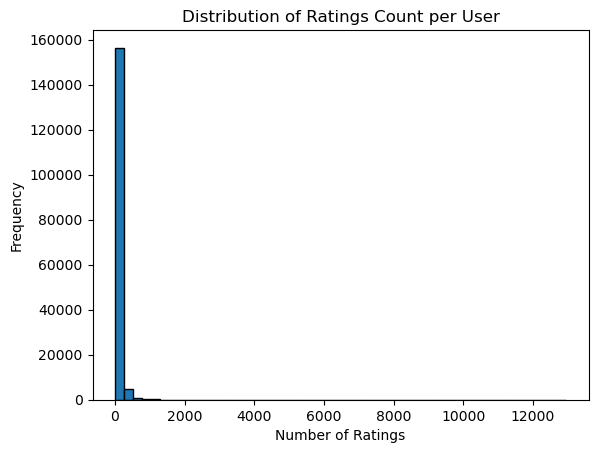

In [20]:
# Display summary statistics of numerical features in train data
print(train.describe())

# Visualize the distribution of ratings for each user
user_rating_counts = train.groupby('userId')['rating'].count()
plt.hist(user_rating_counts, bins=50, edgecolor='black')
plt.title('Distribution of Ratings Count per User')
plt.xlabel('Number of Ratings')
plt.ylabel('Frequency')
plt.show()

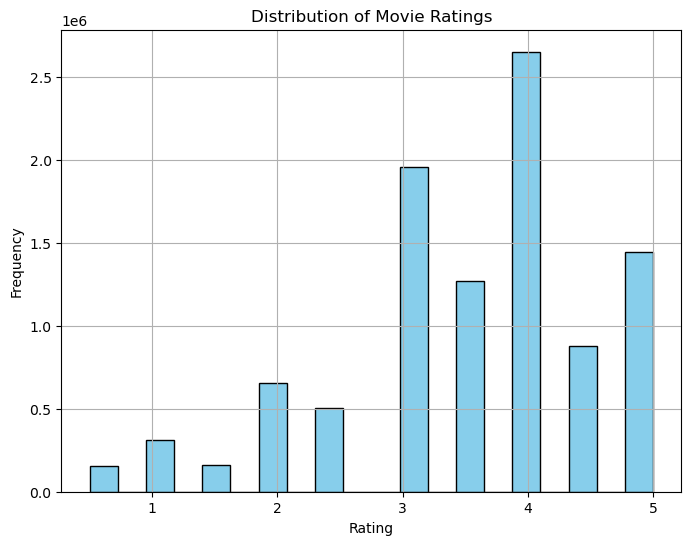

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.hist(train['rating'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()



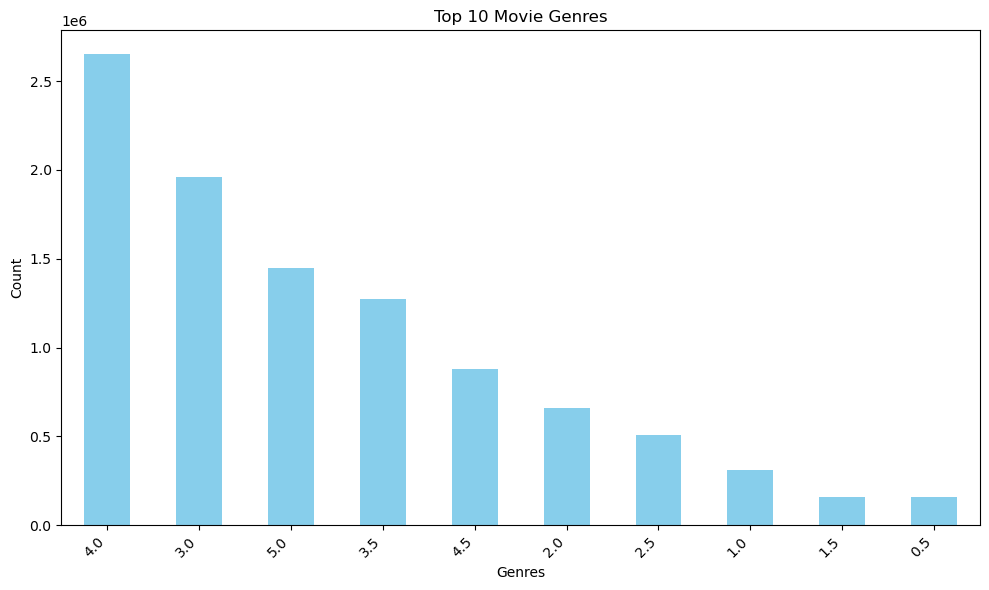

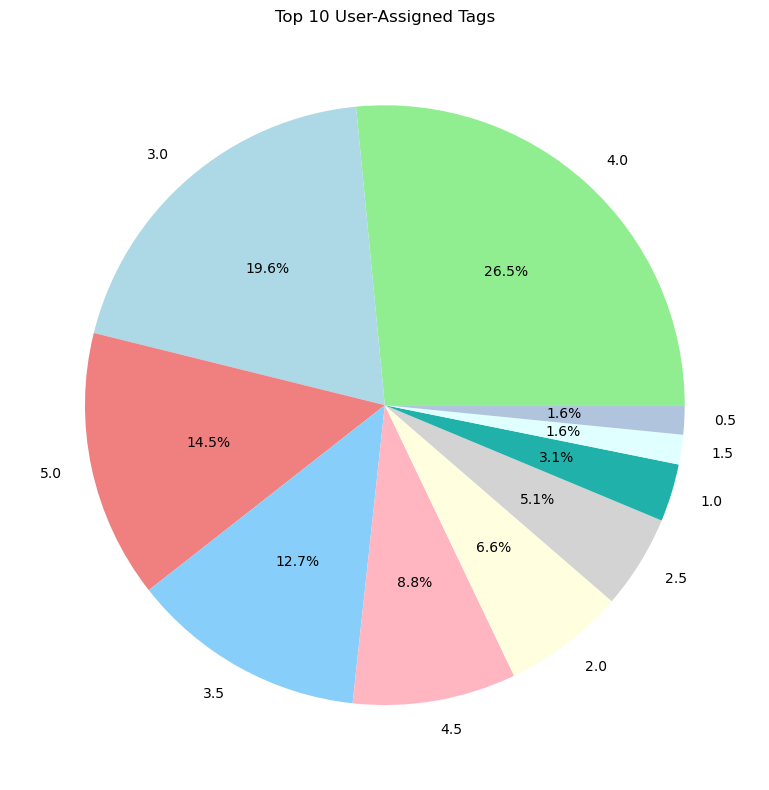

In [24]:
# Visualize distribution of movie genres using a bar plot
plt.figure(figsize=(10, 6))
genre_counts = train['rating'].value_counts().head(10)  
genre_counts.plot(kind='bar', color='skyblue')
plt.title('Top 10 Movie Genres')
plt.xlabel('Genres')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()
plt.show()

# Visualize distribution of user-assigned tags using a pie chart
plt.figure(figsize=(8, 8))
tag_counts = train['rating'].value_counts().head(10) 
tag_counts.plot(kind='pie', autopct='%1.1f%%', colors=['lightgreen', 'lightblue', 'lightcoral', 'lightskyblue', 'lightpink', 'lightyellow', 'lightgrey', 'lightseagreen', 'lightcyan', 'lightsteelblue'])
plt.title('Top 10 User-Assigned Tags')
plt.ylabel('') 
plt.tight_layout()
plt.show()

In [28]:
print('There are ',train["userId"].nunique(), 'users and',train.movieId.nunique(),'movies in the database/dataframe')

There are  162541 users and 48213 movies in the database/dataframe


In [30]:
# Create a Dataframe consisting of the users average rating the give per user and number of times they have rated movies
train1 = pd.DataFrame(train.groupby('userId')['rating'].agg('mean').reset_index())
train1_2 = pd.DataFrame(train.groupby('userId')['rating'].count().reset_index())
# Merge the above to dataframe
train1 = train1.merge(train1_2,on='userId',how = 'left')
# Rename the columns respectively
train1.rename(columns={'rating_x':'avg_rating','rating_y':'number_of_movies'},inplace = True)

# Sort the data in descending of the number of movies the user has rated
train1 = train1.sort_values('number_of_movies', ascending = False)

# Show 5 observations 
train1.head()

,userId,avg_rating,number_of_movies
72314,72315,3.092380,12952
80973,80974,3.277582,3680
137292,137293,3.192168,3588
33843,33844,2.583853,3208
20054,20055,3.179016,3050


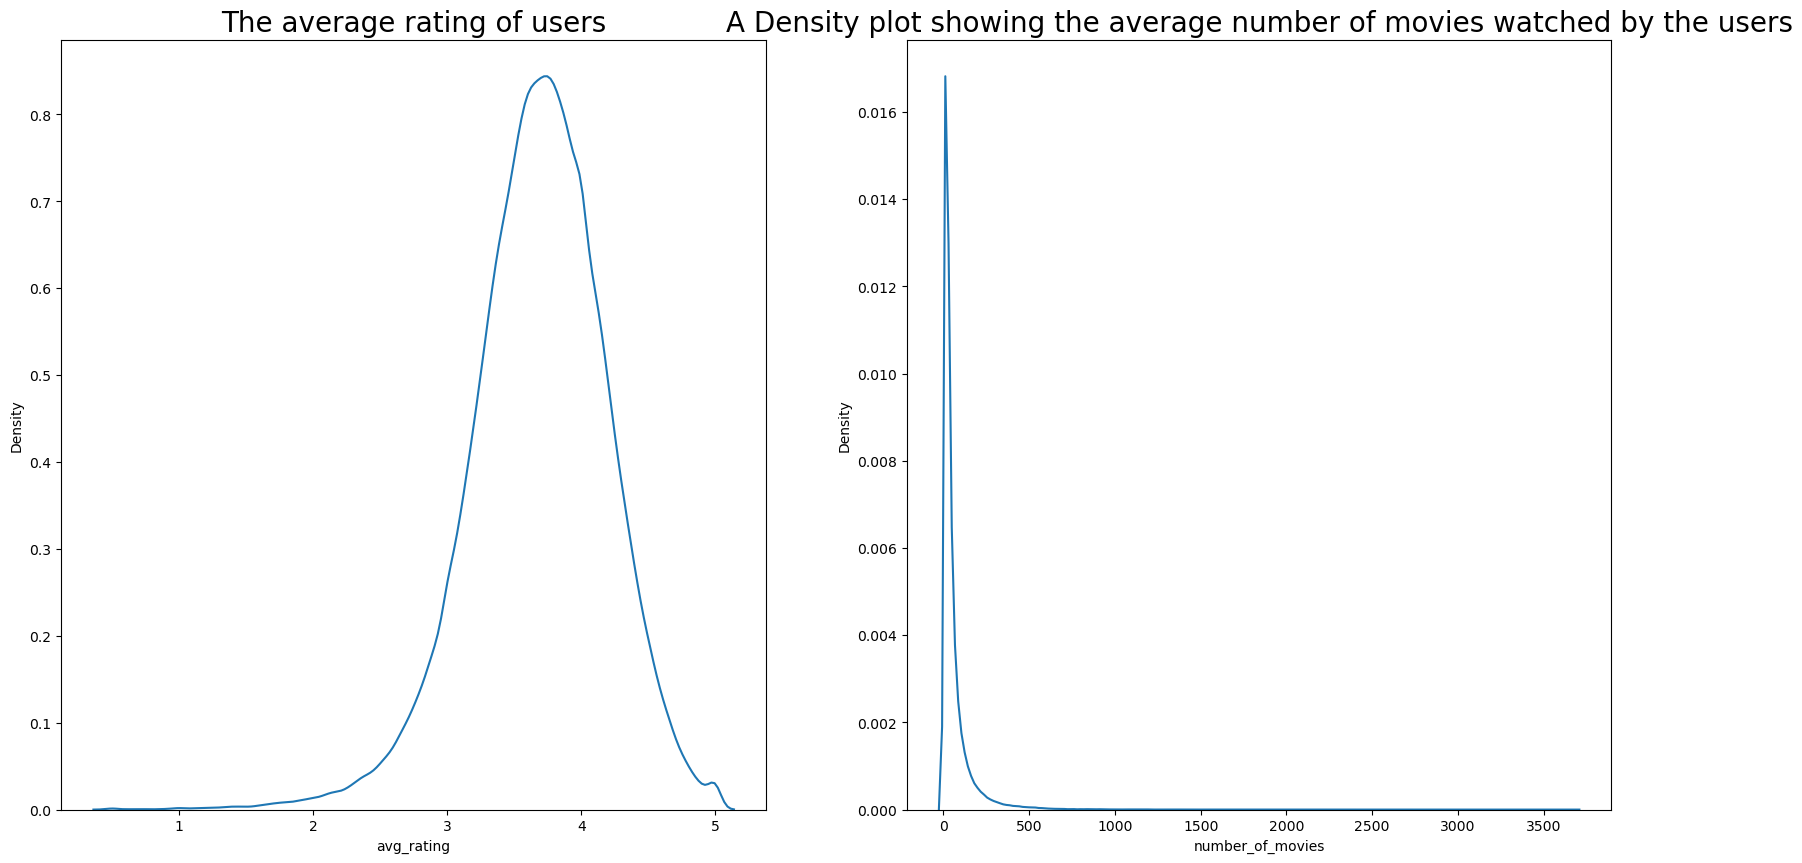

In [31]:
# Initialize the plot with set figure size
fig, ax = plt.subplots(1,2,figsize=(20, 10)) 

# Create a densityplot to visualise the density of the ratings per users
sns.kdeplot(ax=ax[0], x='avg_rating', data=train1) 
ax[0].set_title("The average rating of users",fontsize = 20)

# Set the tick labels to appear in non-scientific form
plt.ticklabel_format(style='plain', axis='y', useOffset=False) 

# Create a KDE plot of the rating the users 
sns.kdeplot(ax=ax[1], x='number_of_movies', data=train1[1:]) 
ax[1].set_title("A Density plot showing the average number of movies watched by the users",fontsize = 20)
    
# Show density plot
plt.show()

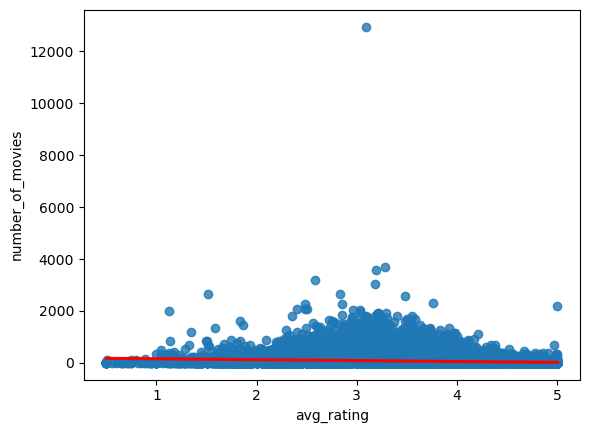

In [32]:
# Check for correlation between average rating and the number of the times have the user has watch a movie

# Create a scatter plot to visualise 
sns.regplot(data = train1, y = "number_of_movies", x = "avg_rating",line_kws={"color": "red"})

# Show the scatterplot
plt.show()

In [33]:
train.rating.value_counts()

rating
4.0    2652977
3.0    1959759
5.0    1445230
3.5    1270642
4.5     880516
2.0     656821
2.5     505578
1.0     311213
1.5     159731
0.5     157571
Name: count, dtype: int64

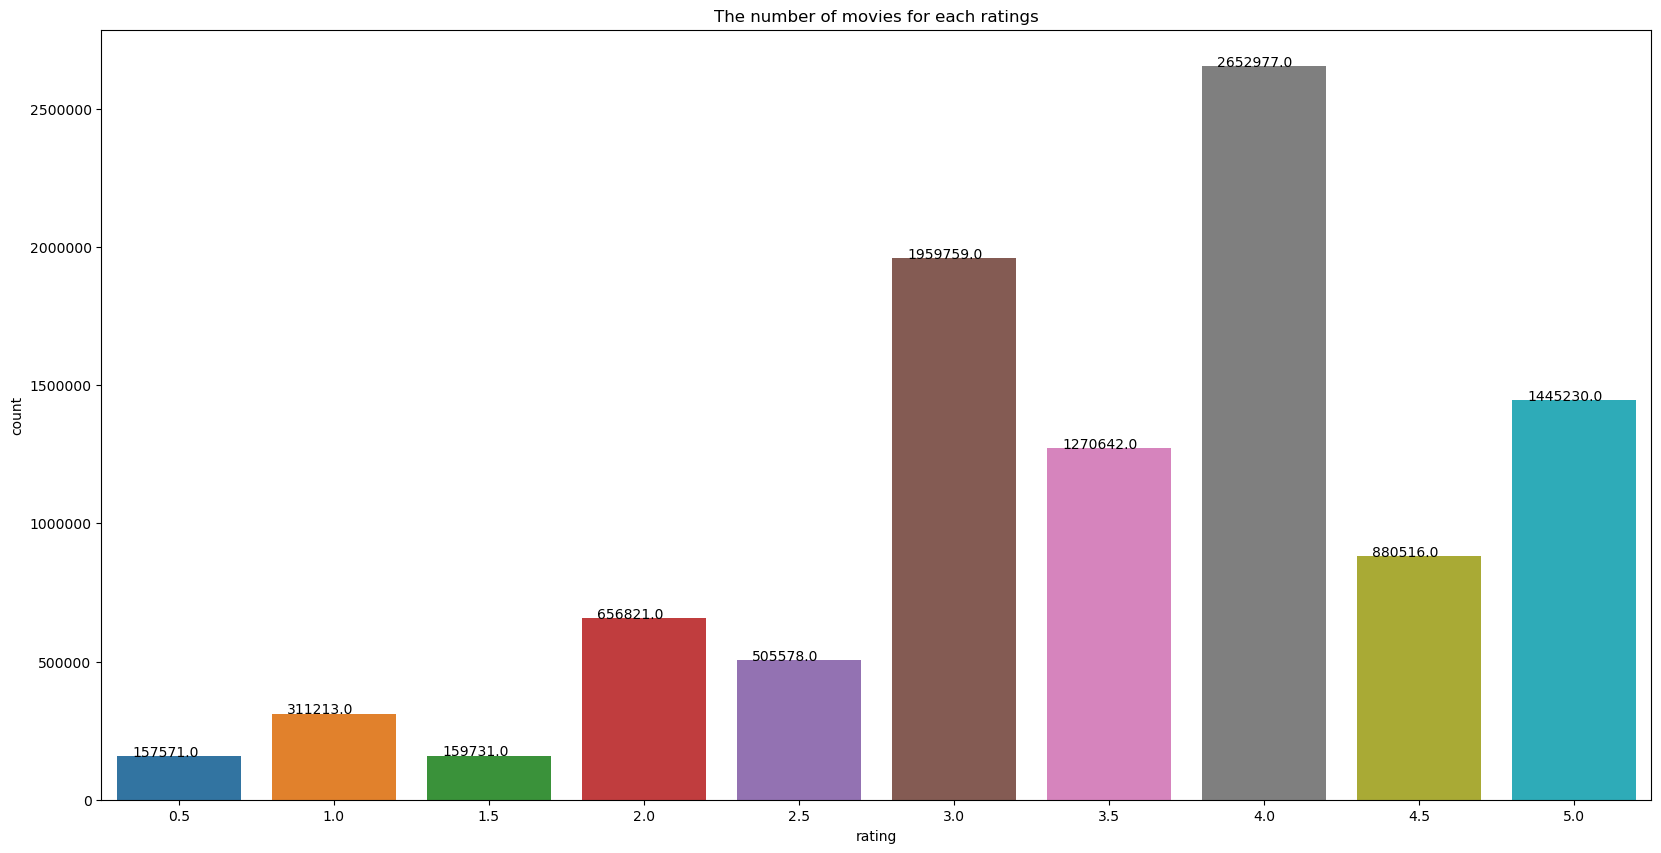

In [34]:
# Plotting the graph
fig, ax = plt.subplots(figsize=(20, 10)) 

sns.countplot(ax=ax, x='rating', data=train) 
ax.set_title("The number of movies for each ratings")
plt.ticklabel_format(style='plain', axis='y', useOffset=False) 

# Make the counts appear on the different
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))
    
# Show the countplot
plt.show()

In [35]:
train_movies = train.merge(movies,on = 'movieId') # Merges the movie and train datasets
train_movies.drop(columns=['timestamp'],inplace=True) # Dropping the timestamp column
train_movies.head(10) # Shows the first 10 observations

,userId,movieId,rating,title,genres
0,5163,57669,4.0,In Bruges (2008),Comedy|Crime|Drama|Thriller
1,87388,57669,3.5,In Bruges (2008),Comedy|Crime|Drama|Thriller
2,137050,57669,4.0,In Bruges (2008),Comedy|Crime|Drama|Thriller
3,120490,57669,4.5,In Bruges (2008),Comedy|Crime|Drama|Thriller
4,50616,57669,4.5,In Bruges (2008),Comedy|Crime|Drama|Thriller
5,99887,57669,0.5,In Bruges (2008),Comedy|Crime|Drama|Thriller
6,120194,57669,4.5,In Bruges (2008),Comedy|Crime|Drama|Thriller
7,847,57669,3.5,In Bruges (2008),Comedy|Crime|Drama|Thriller
8,47201,57669,4.5,In Bruges (2008),Comedy|Crime|Drama|Thriller
9,94499,57669,4.5,In Bruges (2008),Comedy|Crime|Drama|Thriller


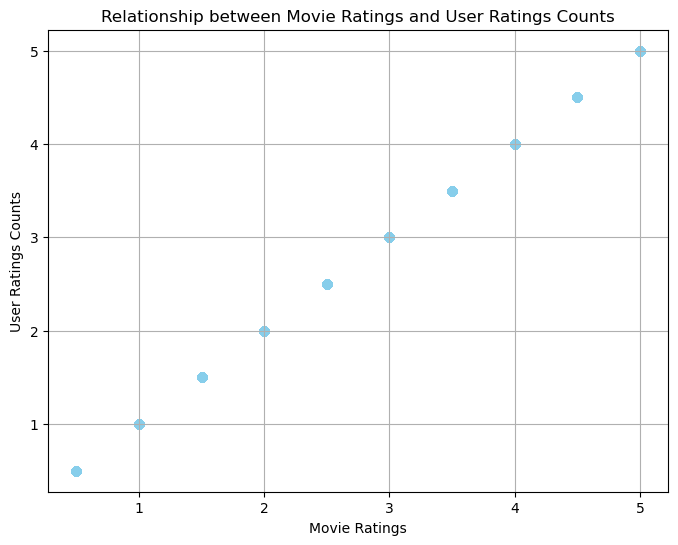

In [37]:
# Create a scatter plot to explore the relationship between movie ratings and user ratings counts
plt.figure(figsize=(8, 6))
plt.scatter(train['rating'],train['rating'], color='skyblue', alpha=0.6)
plt.title('Relationship between Movie Ratings and User Ratings Counts')
plt.xlabel('Movie Ratings')
plt.ylabel('User Ratings Counts')
plt.grid(True)
plt.show()


In [39]:
# Display links data
print(links.head())

# Check for missing values in links data
print(links.isnull().sum())

   movieId  imdbId   tmdbId
0        1  114709    862.0
1        2  113497   8844.0
2        3  113228  15602.0
3        4  114885  31357.0
4        5  113041  11862.0
movieId      0
imdbId       0
tmdbId     107
dtype: int64


In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Display the first few rows of the dataset
print(movies.head())

# Summary statistics
print(movies.describe())

# Check for missing values
print(movies.isnull().sum())

   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  
             movieId
count   62423.000000
mean   122220.387646
std     63264.744844
min         1.000000
25%     82146.500000
50%    138022.000000
75%    173222.000000
max    209171.000000
movieId    0
title      0
genres     0
dtype: int64


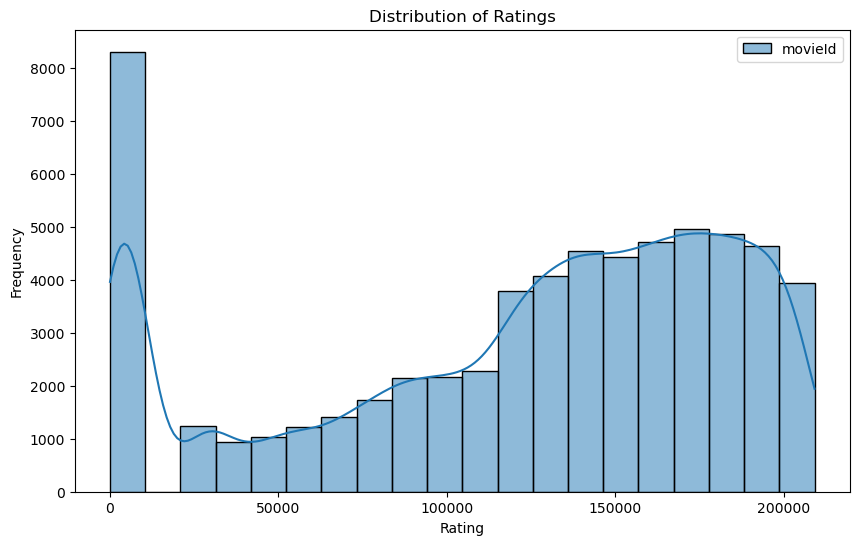

In [47]:
# Distribution of Ratings
plt.figure(figsize=(10, 6))
sns.histplot(movies, kde=True, bins=20, color='skyblue')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

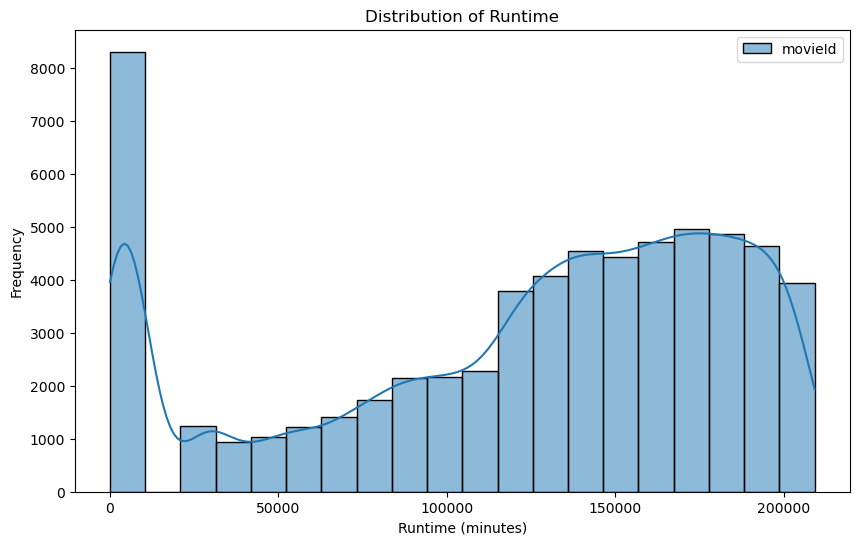

In [50]:
# Distribution of Runtime
plt.figure(figsize=(10, 6))
sns.histplot(movies, kde=True, bins=20, color='orange')
plt.title('Distribution of Runtime')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Frequency')
plt.show()

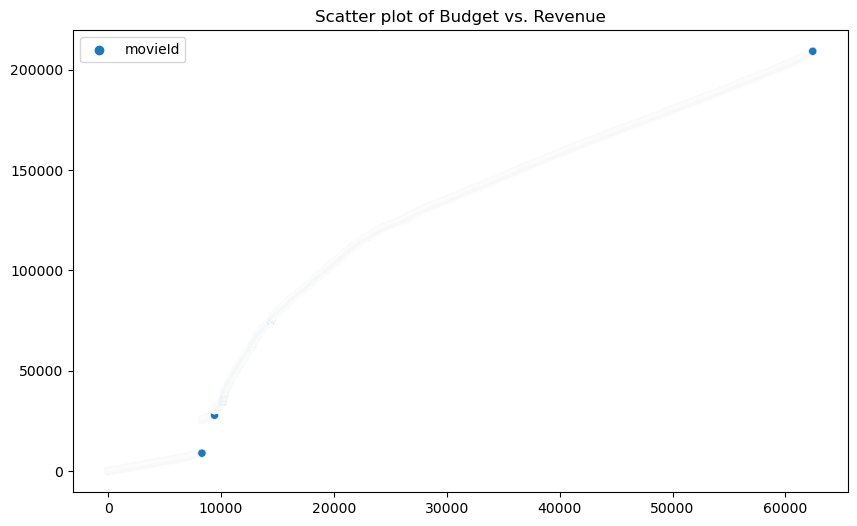

In [59]:
# Revenue vs. Budget Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=movies, color='green')
plt.title('Scatter plot of Budget vs. Revenue')
plt.show()

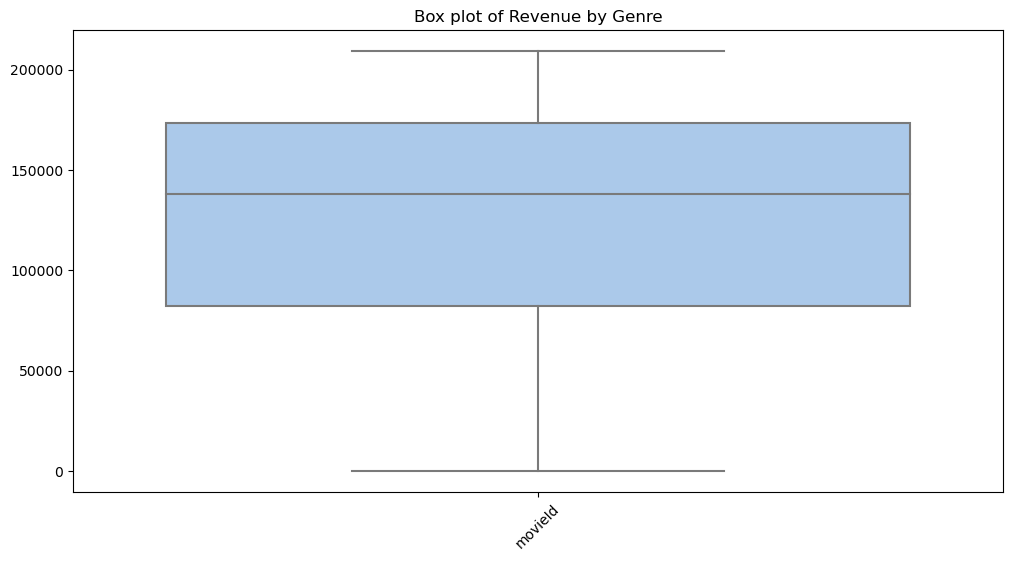

In [61]:
# Revenue by Genre
plt.figure(figsize=(12, 6))
sns.boxplot(data=movies, palette='pastel')
plt.title('Box plot of Revenue by Genre')
plt.xticks(rotation=45)
plt.show()

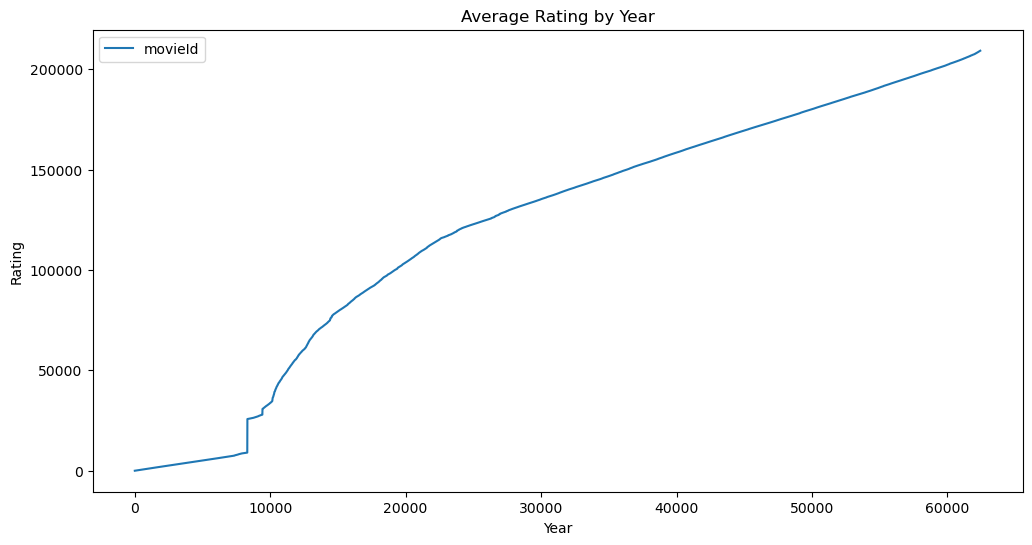

In [63]:
# Rating by Year
plt.figure(figsize=(12, 6))
sns.lineplot(data=movies, color='red')
plt.title('Average Rating by Year')
plt.xlabel('Year')
plt.ylabel('Rating')
plt.show()

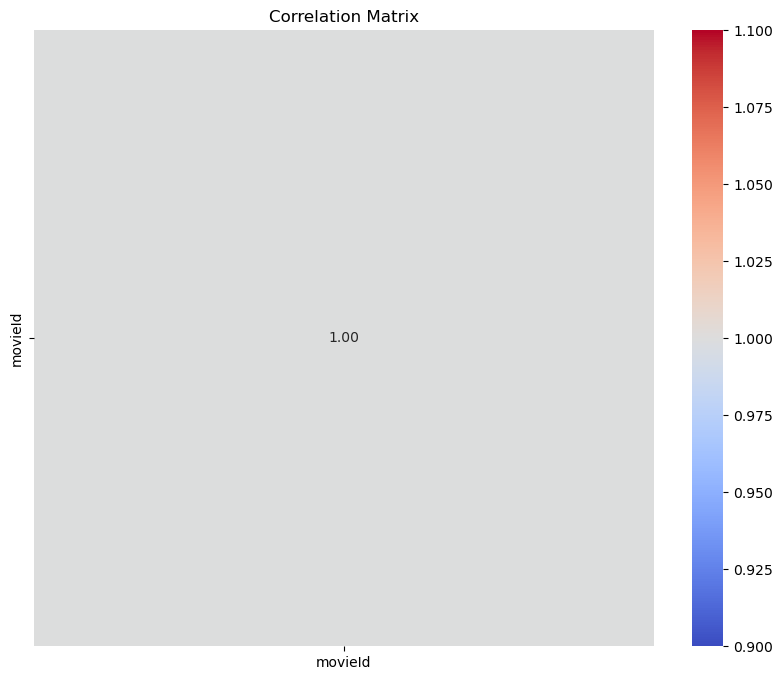

In [65]:
# Exclude non-numeric columns
numeric_columns = movies.select_dtypes(include=[np.number])

# Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_columns.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


<a id="four"></a>
## 4. Feature Engineering 
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>



To capture all the preprocessing happening within the data, we start a comet experiment:

In [8]:
if COMET_FLAG:
  # Start comet experiment:
  experiment = Experiment(
    api_key = COMET_API_KEY,
    project_name = COMET_PROJECT_NAME,
    workspace= COMET_WORKSPACE
  )

  experiment.add_tag("Data Preprocessing")
  experiment.set_name("Data Preprocessing")

We first begin by reloading the data and discarding the changes made during the EDA section:

In [9]:
# Reset all dataframes to original structure to aid with coherent preprocessing
genome_scores_df = pd.read_csv('genome_scores.csv')
genome_tags_df = pd.read_csv('genome_tags.csv')
imdb_data_df = pd.read_csv('imdb_data.csv')
links_df = pd.read_csv('links.csv')
movies_df = pd.read_csv('movies.csv')
tags_df = pd.read_csv('tags.csv')
test_df = pd.read_csv('test.csv')
train_df = pd.read_csv('train.csv')

We also reload the supplementary director data that we have downloaded in order to fix the inaccurate director data in our native dataset:

In [10]:
# Resetting supplementary IMDB Data
extra_imdb_name_basics_df = pd.read_table("./Resources/name.basics.tsv")
extra_imdb_title_crew_df = pd.read_table("./Resources/title.crew.tsv")

Let's start by updating our faulty director data.

To make sure we apply the changes correctly, we first view the current data as it is:

In [11]:
# Showing current state of data
imdb_data_df.head(10)

,movieId,title_cast,director,runtime,budget,plot_keywords
0,1,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation
1,2,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,Jonathan Hensleigh,104.0,"$65,000,000",board game|adventurer|fight|game
2,3,Walter Matthau|Jack Lemmon|Sophia Loren|Ann-Ma...,Mark Steven Johnson,101.0,"$25,000,000",boat|lake|neighbor|rivalry
3,4,Whitney Houston|Angela Bassett|Loretta Devine|...,Terry McMillan,124.0,"$16,000,000",black american|husband wife relationship|betra...
4,5,Steve Martin|Diane Keaton|Martin Short|Kimberl...,Albert Hackett,106.0,"$30,000,000",fatherhood|doberman|dog|mansion
5,6,Al Pacino|Robert De Niro|Val Kilmer|Jon Voight...,Michael Mann,170.0,"$60,000,000",gun battle|organized crime|honor|criminal inve...
6,7,Harrison Ford|Julia Ormond|Greg Kinnear|Nancy ...,Samuel A. Taylor,127.0,"$58,000,000",character name as title|chauffeur|estate|playboy
7,8,Jonathan Taylor Thomas|Brad Renfro|Eric Schwei...,Mark Twain,97.0,NaN,rescue from drowning|near drowning|character n...
8,9,Jean-Claude Van Damme|Powers Boothe|Raymond J....,Karen Elise Baldwin,111.0,"$35,000,000",hockey|death in title|two word title|terrorist
9,10,Pierce Brosnan|Sean Bean|Izabella Scorupco|Fam...,Ian Fleming,130.0,"$60,000,000",official james bond series|james bond characte...


In [12]:
# Removing unnecessary columns from imported data
extra_imdb_name_basics_df.drop(["birthYear", "deathYear", "primaryProfession", 'knownForTitles'], axis=1, inplace=True)
extra_imdb_title_crew_df.drop(['writers'], axis=1, inplace=True)
extra_imdb_title_crew_df.rename(columns={"directors": "nconst"}, inplace=True)

# Joining imported datasets
df_extra_imdb_combo = pd.merge(extra_imdb_title_crew_df, extra_imdb_name_basics_df, on="nconst", how="left")
df_extra_imdb_combo.drop("nconst", axis=1, inplace=True)

# Converting IMDB ID to correct format
df_extra_imdb_combo.rename(columns={"tconst":"imdbId"}, inplace=True)
df_extra_imdb_combo['imdbId'] = df_extra_imdb_combo['imdbId'].str.replace('tt','').astype(int)
df_extra_imdb_combo.head()

,imdbId,primaryName
0,1,William K.L. Dickson
1,2,Émile Reynaud
2,3,Émile Reynaud
3,4,Émile Reynaud
4,5,William K.L. Dickson


Next, we update our director data, using the links.csv file to ensure our movieID's line up with the IMDB dataset movie ID's

In [13]:
# Adding the corresponding IMDB links to the dataframe we need to update:
imdb_data_df = pd.merge(imdb_data_df, links_df[['movieId', 'imdbId']], on='movieId', how='left')

# Merging the correct director into a new column (primaryName) in the dataframe 
imdb_data_df = pd.merge(imdb_data_df, df_extra_imdb_combo, on='imdbId', how='left')



# Function to update the director with correct value
def replace_director(df):
    for index, row in df.iterrows():
        if pd.notnull(row['primaryName']):
            df.at[index, 'director'] = row['primaryName']
    return df

# Applying the function
imdb_data_df = replace_director(imdb_data_df)

# Dropping redundant columns after merge
imdb_data_df.drop('imdbId', axis=1, inplace=True)
imdb_data_df.drop('primaryName', axis=1, inplace=True)

# Verifying the changes
imdb_data_df.head(10)

,movieId,title_cast,director,runtime,budget,plot_keywords
0,1,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation
1,2,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,Joe Johnston,104.0,"$65,000,000",board game|adventurer|fight|game
2,3,Walter Matthau|Jack Lemmon|Sophia Loren|Ann-Ma...,Howard Deutch,101.0,"$25,000,000",boat|lake|neighbor|rivalry
3,4,Whitney Houston|Angela Bassett|Loretta Devine|...,Forest Whitaker,124.0,"$16,000,000",black american|husband wife relationship|betra...
4,5,Steve Martin|Diane Keaton|Martin Short|Kimberl...,Charles Shyer,106.0,"$30,000,000",fatherhood|doberman|dog|mansion
5,6,Al Pacino|Robert De Niro|Val Kilmer|Jon Voight...,Michael Mann,170.0,"$60,000,000",gun battle|organized crime|honor|criminal inve...
6,7,Harrison Ford|Julia Ormond|Greg Kinnear|Nancy ...,Sydney Pollack,127.0,"$58,000,000",character name as title|chauffeur|estate|playboy
7,8,Jonathan Taylor Thomas|Brad Renfro|Eric Schwei...,Peter Hewitt,97.0,NaN,rescue from drowning|near drowning|character n...
8,9,Jean-Claude Van Damme|Powers Boothe|Raymond J....,Peter Hyams,111.0,"$35,000,000",hockey|death in title|two word title|terrorist
9,10,Pierce Brosnan|Sean Bean|Izabella Scorupco|Fam...,Martin Campbell,130.0,"$60,000,000",official james bond series|james bond characte...


Now that we have corrected our faulty director data, we can proceed to transform our data into a useful structure.

To begin, let's create a new dataframe that will house all our available movie data in one convenient location

In [14]:
# Create a df for storing all available movie data
all_movie_data = imdb_data_df

# Add movie title and genres to the new dataframe
all_movie_data = pd.merge(all_movie_data, movies_df, on='movieId', how='left')

# Remove movies with unknown titles
all_movie_data = all_movie_data[all_movie_data['title'].notna()]

# Verifying the changes
all_movie_data.head()

,movieId,title_cast,director,runtime,budget,plot_keywords,title,genres
0,1,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,Joe Johnston,104.0,"$65,000,000",board game|adventurer|fight|game,Jumanji (1995),Adventure|Children|Fantasy
2,3,Walter Matthau|Jack Lemmon|Sophia Loren|Ann-Ma...,Howard Deutch,101.0,"$25,000,000",boat|lake|neighbor|rivalry,Grumpier Old Men (1995),Comedy|Romance
3,4,Whitney Houston|Angela Bassett|Loretta Devine|...,Forest Whitaker,124.0,"$16,000,000",black american|husband wife relationship|betra...,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Steve Martin|Diane Keaton|Martin Short|Kimberl...,Charles Shyer,106.0,"$30,000,000",fatherhood|doberman|dog|mansion,Father of the Bride Part II (1995),Comedy


The next step is to add the user tags and genome tags to the movie metadata

In [15]:
# Filter out genome scores below threshold to ensure only relevant tags gets mapped to movie metadata
filtered_genome_tag_data = genome_scores_df[genome_scores_df['relevance']>= GENOME_RELEVANCE_THRESHOLD]

# Merging genome scores with genome tags
filtered_genome_tag_data = pd.merge(filtered_genome_tag_data, genome_tags_df, on='tagId')

# Dropping redundant columns
filtered_genome_tag_data = filtered_genome_tag_data.drop(["tagId", "relevance"], axis=1)

# To keep tags of multiple words as a single entity, we replace spaces with underscores
filtered_genome_tag_data['tag'] = filtered_genome_tag_data['tag'].str.replace(" ", "_")

# Adding a space after each tag so that tags get merged as individual entities
filtered_genome_tag_data['tag'] = filtered_genome_tag_data['tag'] + " "

# Combining all tags for each movie
filtered_genome_tag_data = filtered_genome_tag_data.groupby(by = 'movieId').sum()

# Renaming tag column so that it does not get confused with user generated tags later on
filtered_genome_tag_data.rename(columns={"tag": "genome_tags"}, inplace=True)

# Adding our genome tags to movie metadata
all_movie_data = pd.merge(all_movie_data, filtered_genome_tag_data, on='movieId', how='left')

# Verifying changes
all_movie_data.head()

,movieId,title_cast,director,runtime,budget,plot_keywords,title,genres,genome_tags
0,1,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,action adventure affectionate animated animati...
1,2,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,Joe Johnston,104.0,"$65,000,000",board game|adventurer|fight|game,Jumanji (1995),Adventure|Children|Fantasy,adventure childhood children entertaining fami...
2,3,Walter Matthau|Jack Lemmon|Sophia Loren|Ann-Ma...,Howard Deutch,101.0,"$25,000,000",boat|lake|neighbor|rivalry,Grumpier Old Men (1995),Comedy|Romance,original comedy good_sequel gunfight sequel se...
3,4,Whitney Houston|Angela Bassett|Loretta Devine|...,Forest Whitaker,124.0,"$16,000,000",black american|husband wife relationship|betra...,Waiting to Exhale (1995),Comedy|Drama|Romance,chick_flick divorce girlie_movie relationships...
4,5,Steve Martin|Diane Keaton|Martin Short|Kimberl...,Charles Shyer,106.0,"$30,000,000",fatherhood|doberman|dog|mansion,Father of the Bride Part II (1995),Comedy,family feel-good original comedy good_sequel s...


We repeat the process above with the user generated tags

In [16]:
# Select features to join into movie metadata
modified_user_tags = tags_df[['movieId', 'tag']]

# Replace spaces with underscores so that entities remain unique
modified_user_tags['tag'] = modified_user_tags['tag'].str.replace(" ", "_")

# Adding a space after each tag so that tags get merged as individual entities
modified_user_tags['tag'] = modified_user_tags['tag'] + " "

# Combining all tags for each movie
modified_user_tags = modified_user_tags.groupby(by='movieId').sum()

# Renaming tag column to avoid confusion with genome tags
modified_user_tags.rename(columns={"tag": "user_tags"}, inplace=True)

# Converting tags to lowercase to avoid unwanted distinction
modified_user_tags['user_tags'] = modified_user_tags['user_tags'].str.lower()

# Removing any punctuation except underscores
removelist = []
for punc in string.punctuation:
    if punc != '_':
        removelist.append(punc)

for char in removelist:
    modified_user_tags['user_tags'] = modified_user_tags['user_tags'].str.replace(char, '')

# Adding user tags to movie metadata
all_movie_data = pd.merge(all_movie_data, modified_user_tags, on='movieId', how='left')

# Verifying changes
all_movie_data.head()

,movieId,title_cast,director,runtime,budget,plot_keywords,title,genres,genome_tags,user_tags
0,1,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,action adventure affectionate animated animati...,owned imdb_top_250 pixar pixar time_travel chi...
1,2,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,Joe Johnston,104.0,"$65,000,000",board game|adventurer|fight|game,Jumanji (1995),Adventure|Children|Fantasy,adventure childhood children entertaining fami...,robin_williams time_travel fantasy based_on_ch...
2,3,Walter Matthau|Jack Lemmon|Sophia Loren|Ann-Ma...,Howard Deutch,101.0,"$25,000,000",boat|lake|neighbor|rivalry,Grumpier Old Men (1995),Comedy|Romance,original comedy good_sequel gunfight sequel se...,funny best_friend duringcreditsstinger fishing...
3,4,Whitney Houston|Angela Bassett|Loretta Devine|...,Forest Whitaker,124.0,"$16,000,000",black american|husband wife relationship|betra...,Waiting to Exhale (1995),Comedy|Drama|Romance,chick_flick divorce girlie_movie relationships...,based_on_novel_or_book chick_flick divorce int...
4,5,Steve Martin|Diane Keaton|Martin Short|Kimberl...,Charles Shyer,106.0,"$30,000,000",fatherhood|doberman|dog|mansion,Father of the Bride Part II (1995),Comedy,family feel-good original comedy good_sequel s...,aging baby confidence contraception daughter g...


Since the era of release of a movie could be an important feature for recommending other movies to users, we extract the decade when the movie was released from the film title and make it it's own feature

In [17]:
# Feature to create `release_year` and `release_decade` feature from movie title
def get_decade(df):


    # Extract date from title
    df['release_year'] = df['title'].str[-6:]

    # Remove brackets from date
    for char in ['(', ')']:
        df['release_year'] = df['release_year'].str.replace(char, '')
    
    # Extract decade of release from release year
    df['release_decade'] = df['release_year'].str[:-1] + "0's"

    # Converting release year to integer
    #df['release_year'] = df['release_year'].astype(int)

    # Run through df to see if year and decade got extracted correctly:
    for index, row in df.iterrows():
        year = row['release_year']
        if year.isnumeric():
            # Convert year to intiger
            df.at[index, 'release_year'] = int(year)
        else:
            # Year extraction failed. Remove year and decade data
            df.at[index, 'release_year'] = np.nan
            df.at[index, 'release_decade'] = np.nan
    return df

# Applying the function
all_movie_data = get_decade(all_movie_data)

#Verifying changes
all_movie_data.head()

,movieId,title_cast,director,runtime,budget,plot_keywords,title,genres,genome_tags,user_tags,release_year,release_decade
0,1,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,action adventure affectionate animated animati...,owned imdb_top_250 pixar pixar time_travel chi...,1995,1990's
1,2,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,Joe Johnston,104.0,"$65,000,000",board game|adventurer|fight|game,Jumanji (1995),Adventure|Children|Fantasy,adventure childhood children entertaining fami...,robin_williams time_travel fantasy based_on_ch...,1995,1990's
2,3,Walter Matthau|Jack Lemmon|Sophia Loren|Ann-Ma...,Howard Deutch,101.0,"$25,000,000",boat|lake|neighbor|rivalry,Grumpier Old Men (1995),Comedy|Romance,original comedy good_sequel gunfight sequel se...,funny best_friend duringcreditsstinger fishing...,1995,1990's
3,4,Whitney Houston|Angela Bassett|Loretta Devine|...,Forest Whitaker,124.0,"$16,000,000",black american|husband wife relationship|betra...,Waiting to Exhale (1995),Comedy|Drama|Romance,chick_flick divorce girlie_movie relationships...,based_on_novel_or_book chick_flick divorce int...,1995,1990's
4,5,Steve Martin|Diane Keaton|Martin Short|Kimberl...,Charles Shyer,106.0,"$30,000,000",fatherhood|doberman|dog|mansion,Father of the Bride Part II (1995),Comedy,family feel-good original comedy good_sequel s...,aging baby confidence contraception daughter g...,1995,1990's


Next, we shift our focus to the genres feature. Currently, if we do not have data regarding the genre of a movie, the genre feature contains text stating that no genres are listed. This could be problematic, since this will lead our recommender models to identify similarities between movies we don't have data for when in reality there is none. As such, we delete the text indicating missing genres:

In [18]:
# Remove unlisted genre descriptions
all_movie_data['genres'] = all_movie_data['genres'].str.replace( "(no genres listed)" ,"")

Finally, we need to apply some text cleaning on our text features that we haven't touched yet. Splitting entities and removing punctuation will be performed on the title_cast, director, plot_keywords, and genres features

In [19]:
# Process text data
def clean_text_features(df):
    # Features to process
    features = ['title_cast', 'director', 'plot_keywords', 'genres']

    # Apply changes to all features
    for feature in features:
        # Replace spaces with underscores to ensure multiple-worded concepts gets treated as single entity
        df[feature] = df[feature].str.replace(' ', '_')

        # Replace pipe symbol (|) with space to separate different entities
        df[feature] = df[feature].str.replace('|', ' ')

        # Convert string to lowercase to avoid unwanted distinctions
        df[feature] = df[feature].str.lower()

    return df

# Applying the function
all_movie_data = clean_text_features(all_movie_data)

# Verifying changes
all_movie_data.head()

,movieId,title_cast,director,runtime,budget,plot_keywords,title,genres,genome_tags,user_tags,release_year,release_decade
0,1,tom_hanks tim_allen don_rickles jim_varney wal...,john_lasseter,81.0,"$30,000,000",toy rivalry cowboy cgi_animation,Toy Story (1995),adventure animation children comedy fantasy,action adventure affectionate animated animati...,owned imdb_top_250 pixar pixar time_travel chi...,1995,1990's
1,2,robin_williams jonathan_hyde kirsten_dunst bra...,joe_johnston,104.0,"$65,000,000",board_game adventurer fight game,Jumanji (1995),adventure children fantasy,adventure childhood children entertaining fami...,robin_williams time_travel fantasy based_on_ch...,1995,1990's
2,3,walter_matthau jack_lemmon sophia_loren ann-ma...,howard_deutch,101.0,"$25,000,000",boat lake neighbor rivalry,Grumpier Old Men (1995),comedy romance,original comedy good_sequel gunfight sequel se...,funny best_friend duringcreditsstinger fishing...,1995,1990's
3,4,whitney_houston angela_bassett loretta_devine ...,forest_whitaker,124.0,"$16,000,000",black_american husband_wife_relationship betra...,Waiting to Exhale (1995),comedy drama romance,chick_flick divorce girlie_movie relationships...,based_on_novel_or_book chick_flick divorce int...,1995,1990's
4,5,steve_martin diane_keaton martin_short kimberl...,charles_shyer,106.0,"$30,000,000",fatherhood doberman dog mansion,Father of the Bride Part II (1995),comedy,family feel-good original comedy good_sequel s...,aging baby confidence contraception daughter g...,1995,1990's


The last step involves converting the movie budget to USD, and making sure it is of numeric datatype:

In [20]:
# Create currency converter
c = CurrencyConverter()
available_currencies = list(c.currencies)

# Function to clean movie budget
def clean_and_convert_budget(budgetstring):

    # Test if value is missing
    if budgetstring != budgetstring:
        return np.nan
    
    # Delete commas from input string
    budgetstring = budgetstring.replace(",", "")

    # If in USD, convert to correct int format
    if budgetstring[0] == '$':
        new_budget = budgetstring.replace('$', '')
        return int(new_budget)
    
    # If able to convert to USD, convert to USD
    elif budgetstring[:3] in available_currencies:
        currency = budgetstring[:3]
        value = budgetstring[3:]
        new_value = c.convert(int(value), currency, "USD")
        return int(new_value)

    # If unable to convert to USD, delete entry since we can't use it
    else:
        return np.nan


# Applying the function
all_movie_data['budget'] = all_movie_data["budget"].apply(clean_and_convert_budget)
all_movie_data.head()

,movieId,title_cast,director,runtime,budget,plot_keywords,title,genres,genome_tags,user_tags,release_year,release_decade
0,1,tom_hanks tim_allen don_rickles jim_varney wal...,john_lasseter,81.0,30000000.0,toy rivalry cowboy cgi_animation,Toy Story (1995),adventure animation children comedy fantasy,action adventure affectionate animated animati...,owned imdb_top_250 pixar pixar time_travel chi...,1995,1990's
1,2,robin_williams jonathan_hyde kirsten_dunst bra...,joe_johnston,104.0,65000000.0,board_game adventurer fight game,Jumanji (1995),adventure children fantasy,adventure childhood children entertaining fami...,robin_williams time_travel fantasy based_on_ch...,1995,1990's
2,3,walter_matthau jack_lemmon sophia_loren ann-ma...,howard_deutch,101.0,25000000.0,boat lake neighbor rivalry,Grumpier Old Men (1995),comedy romance,original comedy good_sequel gunfight sequel se...,funny best_friend duringcreditsstinger fishing...,1995,1990's
3,4,whitney_houston angela_bassett loretta_devine ...,forest_whitaker,124.0,16000000.0,black_american husband_wife_relationship betra...,Waiting to Exhale (1995),comedy drama romance,chick_flick divorce girlie_movie relationships...,based_on_novel_or_book chick_flick divorce int...,1995,1990's
4,5,steve_martin diane_keaton martin_short kimberl...,charles_shyer,106.0,30000000.0,fatherhood doberman dog mansion,Father of the Bride Part II (1995),comedy,family feel-good original comedy good_sequel s...,aging baby confidence contraception daughter g...,1995,1990's


To ease some string operations, we remove the apostrophe from film titles

In [21]:
# Remove apostrophe
all_movie_data['title'] = all_movie_data['title'].str.replace("'", "")
all_movie_data.tail(50)

,movieId,title_cast,director,runtime,budget,plot_keywords,title,genres,genome_tags,user_tags,release_year,release_decade
24816,131106,brendon_ryan_barrett kathleen_barr ian_james_c...,owen_hurley,84.0,NaN,bloopers_during_credits scare look_alike ruler,Caspers Haunted Christmas (2000),animation children,NaN,assistant cartoon children holiday kindness lo...,2000,2000's
24817,131108,mario_adorf hartmut_engler bernd_schramm sandr...,eberhard_junkersdorf,89.0,NaN,rooster donkey dog cat,The Fearless Four (1997),,NaN,NaN,1997,1990's
24818,131110,rudy_behlmer drew_casper steve_haberman steve_...,constantine_nasr,NaN,NaN,NaN,A House of Secrets: Exploring Dragonwyck (2008),documentary,NaN,NaN,2008,2000's
24819,131112,tino_mewes manuel_cortez thomas_schmieder coll...,matthias_dinter,NaN,3812200.0,erection_visible_through_blanket dark_humor ba...,Night of the Living Dorks (2004),comedy horror,NaN,car_crash morgue voodoo zombie,2004,2000's
24820,131114,jalil_naciri gilles_bellomi ahcen_titi guillau...,akim_isker,NaN,NaN,police_station bank_heist policeman bank_robber,La Planque (2011),comedy,NaN,NaN,2011,2010's
24821,131116,firmine_richard lucien_jean-baptiste anne_cons...,lucien_jean-baptiste,NaN,NaN,skiing ski_resort scrabble mixed_marriage,La Première étoile (2009),comedy,NaN,NaN,2009,2000's
24822,131118,tom_gerhardt dorkas_kiefer volker_büdts axel_n...,sven_unterwaldt_jr.,89.0,NaN,NaN,Siegfried (2005),comedy,NaN,brother castle rhine sibling_relationship,2005,2000's
24823,131120,pinto_colvig clarence_nash,clarence_nash,NaN,NaN,animal_character_name_in_title goofy_the_dog_c...,Superstar Goofy (1991),animation children comedy,NaN,NaN,1991,1990's
24824,131122,mi-yeon_lee tae-ran_lee jun_kim byeong-chun_ki...,eon-hie_lee,NaN,NaN,NaN,Love Exposure (2007),action comedy drama romance,NaN,woman_director,2007,2000's
24825,131124,john_friedmann florian_simbeck bettina_zimmerm...,axel_sand,80.0,NaN,rescue female_warrior evil_sorcerer dagger,Erkan & Stefan 2 (2002),comedy,NaN,NaN,2002,2000's


That marks the end of data preprocessing for the movie metadata

Let us now divert our focus to filtering our rating data that will be used for model training based on user and movie review thresholds

In [22]:
# Explore the amount of training data before filtering:
before_filter_length = len(train_df)
print('Pre-filtering: training data consists of', before_filter_length, 'entities')

# Function to filter dataframe based on counts of value appearances in specified column:
def filter_by_valuecounts(df, column, threshold):
    result = df[df[column].map(df[column].value_counts()) >= threshold]
    return result

# Applying function to training dataset for movie and user thresholds
train_df_filtered = train_df
train_df_filtered = filter_by_valuecounts(train_df_filtered, 'userId', USER_REVIEW_THRESHOLD)
train_df_filtered = filter_by_valuecounts(train_df_filtered, 'movieId', MOVIE_REVIEW_THRESHOLD)

# Explore the amount of training data after filtering:
after_filter_length = len(train_df_filtered)
print('Post-filtering: training data consists of', after_filter_length, 'entities')
print('Reduction of', before_filter_length - after_filter_length, 'entities: ', after_filter_length/before_filter_length*100, '% of original dataset used')



Pre-filtering: training data consists of 10000038 entities
Post-filtering: training data consists of 7689742 entities
Reduction of 2310296 entities:  76.8971277909144 % of original dataset used


It would also be beneficial to construct a utility matrix of all the users and movie ratings:

In [23]:
# Construct a table showing rating for each movie in dataset by each user:
util_matrix = train_df_filtered.pivot_table(index='userId', columns='movieId', values='rating')

util_matrix

movieId,1,2,3,5,6,7,9,10,11,12,...,168252,171763,174055,176371,177593,177765,179819,187541,187593,195159
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,3.5,NaN,4.5,NaN,NaN,NaN,NaN,4.5,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,4.5,NaN,NaN,NaN,NaN,2.5,NaN,3.5,NaN
5,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162537,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
162538,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
162539,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The utility matrix shows the scores for each movie that each user has rated, and does not contain entries when users have not yet rated a movie

The reduced movie list is then:

In [24]:
# Filter out movies with less reviews than review threshold
df_colab_movies = all_movie_data[all_movie_data['movieId'].isin(list(util_matrix.columns))]
df_colab_movies

,movieId,title_cast,director,runtime,budget,plot_keywords,title,genres,genome_tags,user_tags,release_year,release_decade
0,1,tom_hanks tim_allen don_rickles jim_varney wal...,john_lasseter,81.0,30000000.0,toy rivalry cowboy cgi_animation,Toy Story (1995),adventure animation children comedy fantasy,action adventure affectionate animated animati...,owned imdb_top_250 pixar pixar time_travel chi...,1995,1990's
1,2,robin_williams jonathan_hyde kirsten_dunst bra...,joe_johnston,104.0,65000000.0,board_game adventurer fight game,Jumanji (1995),adventure children fantasy,adventure childhood children entertaining fami...,robin_williams time_travel fantasy based_on_ch...,1995,1990's
2,3,walter_matthau jack_lemmon sophia_loren ann-ma...,howard_deutch,101.0,25000000.0,boat lake neighbor rivalry,Grumpier Old Men (1995),comedy romance,original comedy good_sequel gunfight sequel se...,funny best_friend duringcreditsstinger fishing...,1995,1990's
4,5,steve_martin diane_keaton martin_short kimberl...,charles_shyer,106.0,30000000.0,fatherhood doberman dog mansion,Father of the Bride Part II (1995),comedy,family feel-good original comedy good_sequel s...,aging baby confidence contraception daughter g...,1995,1990's
5,6,al_pacino robert_de_niro val_kilmer jon_voight...,michael_mann,170.0,60000000.0,gun_battle organized_crime honor criminal_inve...,Heat (1995),action crime thriller,action great great_ending great_movie highly_q...,imdb_top_250 great_acting realistic_action sus...,1995,1990's
...,...,...,...,...,...,...,...,...,...,...,...,...
22470,117176,eddie_redmayne felicity_jones tom_prior sophie...,james_marsh,123.0,15000000.0,cambridge_university husband_wife_relationship...,The Theory of Everything (2014),drama romance,good mentor original oscar_winner storytelling...,love physics science stephen_hawking true_stor...,2014,2010's
22792,118696,ian_mckellen martin_freeman richard_armitage k...,peter_jackson,144.0,250000000.0,middle_earth orc hobbit elf,The Hobbit: The Battle of the Five Armies (2014),adventure fantasy,action adventure cgi great_ending original_plo...,fantasy_world battle corruption dragon dwarf e...,2014,2010's
22891,119141,james_franco seth_rogen lizzy_caplan randall_p...,evan_goldberg,112.0,44000000.0,finger_bitten_off assassination_attempt male_n...,The Interview (2014),action comedy,original comedy assassin goofy hilarious parod...,absurd bromance buddy_movie comedy funny propa...,2014,2010's
22892,119145,adrian_quinton colin_firth mark_strong jonno_d...,matthew_vaughn,129.0,81000000.0,spy training female_rear_nudity class_differences,Kingsman: The Secret Service (2015),action adventure comedy crime,action clever entertaining fun fun_movie mento...,british british_comedy fighting_choreografy ge...,2015,2010's


Ending the comet experiment for data preprocessing:

In [25]:
if COMET_FLAG:
    experiment.end()

<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

### 5.1 Content based filtering 

Content-based filtering is a powerful technique used in recommender systems to provide personalized recommendations based on the characteristics and features of items. The process begins with defining a clear set of features for each item, such as movie genres, actors, directors, or plot keywords. These features create a representation of the items in a feature space. Additionally, the recommender system stores data about the user's previous interactions, such as clicks, ratings, and likes, to build a user profile that captures their preferences.

The following image shows the idea behind content based filtering, and was obtained form [turing.com](https://www.turing.com/kb/content-based-filtering-in-recommender-systems#content-based-filtering) 
<br></br>

<div align="center" >
<img src="./Resources/ConterntFilter.webp"
     alt="Workings of Content based filter"
     style="float: center; padding-bottom=0.5em"
     width=600px/>
<div align="center" >
Workings of Content based filter
</div>


As depicted in the image above, let's say there are four movies in the system, and the user has already seen and liked the first two. The content-based filtering algorithm will analyze the features of the movies the user has liked and find similar movies with overlapping characteristics. It might identify that the first two movies are both action movies featuring a popular actor. Based on this information, the system will recommend other action movies starring the same actor, as these movies are likely to align with the user's preferences.

As the user engages more with the system, the recommender becomes more accurate in making future suggestions. The user's preferences are continuously updated based on their interactions, leading to more personalized and relevant recommendations over time. Content-based filtering is particularly useful when there is a rich set of item features and a history of user interactions, allowing the system to tailor suggestions to individual preferences and deliver a more satisfying user experience.

Let's develop our own content based recommender system

To start off, let's remember to start a comet experiment in order to track model version control

In [27]:
if COMET_FLAG:
  # Start comet experiment:
  experiment = Experiment(
    api_key = COMET_API_KEY,
    project_name = COMET_PROJECT_NAME,
    workspace= COMET_WORKSPACE
  )

  experiment.add_tag("Content based filter")
  experiment.set_name("Content based filter")

else:
  print("Experiment not logged")

Experiment not logged


# Collaborative filtering models

In collaborative filtering, the goal is to recommend items (movies in our case) to users based on their similarities with other users. The idea is that if two users have similar preferences or behavior, they might like similar items. The models below will be used to predict how a user would predict a rating of a movie based on the users previous ratings of particular movies.

The following models will be explored:

Singular value decomposition (SVD) model. NormalPredictor model. BaselineOnly model. k-nearest neighbors basic (KNNBasic) model. Non-Negative Matrix Factorization (NMF) model. Firstly we prepare the rating data from the sub_train_set dataframe for further processing using the Surprise library.

### Preparing the data

In [ ]:
# drop the 'timestamp' column
df_train_set_b = df_train_set.drop('timestamp', axis=1)

sub_train_set = df_train_set_b[:5000000]

reader = Reader(rating_scale=(0, 5))  # Specifying the rating scale

#loading the dataset into a Dataset object using the load_from_df method from the Surprise library
data = Dataset.load_from_df(sub_train_set[['userId', 'movieId', 'rating']], reader)

# splitting the data to train and test sets for the model training and evaluation
from surprise.model_selection import train_test_split

trainset, testset = train_test_split(data, test_size=0.2, random_state=42)  

### SVD model

SVD is a mathematical technique that helps us understand and analyze patterns in data. It does this by breaking down the information into different components that allow us to make predictions about what items a user might like. This model is powerful because it can identify hidden patterns and similarities in the data, even if the users and items are very different from each other. It allows us to make personalized recommendations by understanding the unique preferences and characteristics of each user.

In [ ]:
# instantiating the sigulaer value decomposition (SVD) model.
svd_model = SVD()
svd_model.fit(trainset) # training the model.

In [ ]:
# generating predictions on the test set
svd_pred = svd_model.test(testset)

### NormalPredictor model

The NormalPredictor model makes predictions by assuming that the ratings or preferences given to items by users follow a normal distribution. It does not take into account any specific user-item interactions, preferences, or patterns. Instead, it generates random predictions based on the mean and standard deviation of the ratings in the training data. It is primarily used as a benchmark or baseline to compare against more advanced recommendation algorithms and provides a simple and straightforward way to establish a baseline for comparison.

In [ ]:
# instantiating the NormalPredictor model.
np_model = NormalPredictor()  
np_model.fit(trainset)  # Train the model on the training set

In [ ]:
# generating predictions on the test set
np_pred = np_model.test(testset)

### BaselineOnly mode

The BaselineOnly model predicts ratings by considering two baseline factors: the average rating of all items and the average rating given by each user. It assumes that the rating of an item by a user is influenced by both the general tendency of the user to give higher or lower ratings and the general tendency of the item to receive higher or lower ratings.

The model then estimates the baseline ratings by:

calculating the average rating of all items and,
calculating the average rating given by each user.
To make predictions, it adds the baseline ratings to the user-item deviations, which capture the deviations from the baseline for each user-item pair and by combining the baseline ratings and the user-item deviations, the BaselineOnly model can predict the ratings for user-item pairs.

In [ ]:
# instantiating the BaselineOnly model.
blo_model = BaselineOnly()  
blo_model.fit(trainset)  # Train the model on the training set

In [ ]:
# generating predictions on the test set
blo_pred = blo_model.test(testset)

Next, we need to determine which features will be included when trying to find similarities between movies. Users might like moves containing certain cast members, and as such, the cast of the movie in question should be taken into account when making recommendations. Similarly, if viewers enjoy the movies produced by certain directors, chances are that they will enjoy the director's other work, and therefore, the movie director should be considered when determining movie similarities. Furthermore, movies that have similar plot keywords will likely have similar plot lines and themes, and therefore this too needs to be considered when determining similarity. Movie genre is another important consideration in similarity, and movies within the same genre should be grouped together. Also, the genome and user tags will be immensely helpful in quantifying similar aspects between movies, and they should also be considered. Finally, users might be in the mood to watch certain movies form the same time period, and therefore we also include the decade of release into our considerations:

In [28]:
# Function to combine movie features 
def combine_content_features(row):
 return row['title_cast'] + ' ' + row['director'] + ' ' + row['plot_keywords']+ ' ' + row['genres'] + ' ' + row['genome_tags'] + ' ' + row['user_tags'] + ' ' + row['release_decade']

# Creating a copy of the data for use in the content based filter
content_filter_data = all_movie_data

# Making sure we convert all text data to string datatype
content_filter_data['title_cast'] = content_filter_data['title_cast'].astype(str)
content_filter_data['director'] = content_filter_data['director'].astype(str)
content_filter_data['plot_keywords'] = content_filter_data['plot_keywords'].astype(str)
content_filter_data['genres'] = content_filter_data['genres'].astype(str)
content_filter_data['genome_tags'] = content_filter_data['genome_tags'].astype(str)
content_filter_data['user_tags'] = content_filter_data['user_tags'].astype(str)
content_filter_data['release_decade'] = content_filter_data['release_decade'].astype(str)


# Applying the function
content_filter_data['combined_features'] = content_filter_data.apply(combine_content_features, axis=1)
content_filter_data.head()

,movieId,title_cast,director,runtime,budget,plot_keywords,title,genres,genome_tags,user_tags,release_year,release_decade,combined_features
0,1,tom_hanks tim_allen don_rickles jim_varney wal...,john_lasseter,81.0,30000000.0,toy rivalry cowboy cgi_animation,Toy Story (1995),adventure animation children comedy fantasy,action adventure affectionate animated animati...,owned imdb_top_250 pixar pixar time_travel chi...,1995,1990's,tom_hanks tim_allen don_rickles jim_varney wal...
1,2,robin_williams jonathan_hyde kirsten_dunst bra...,joe_johnston,104.0,65000000.0,board_game adventurer fight game,Jumanji (1995),adventure children fantasy,adventure childhood children entertaining fami...,robin_williams time_travel fantasy based_on_ch...,1995,1990's,robin_williams jonathan_hyde kirsten_dunst bra...
2,3,walter_matthau jack_lemmon sophia_loren ann-ma...,howard_deutch,101.0,25000000.0,boat lake neighbor rivalry,Grumpier Old Men (1995),comedy romance,original comedy good_sequel gunfight sequel se...,funny best_friend duringcreditsstinger fishing...,1995,1990's,walter_matthau jack_lemmon sophia_loren ann-ma...
3,4,whitney_houston angela_bassett loretta_devine ...,forest_whitaker,124.0,16000000.0,black_american husband_wife_relationship betra...,Waiting to Exhale (1995),comedy drama romance,chick_flick divorce girlie_movie relationships...,based_on_novel_or_book chick_flick divorce int...,1995,1990's,whitney_houston angela_bassett loretta_devine ...
4,5,steve_martin diane_keaton martin_short kimberl...,charles_shyer,106.0,30000000.0,fatherhood doberman dog mansion,Father of the Bride Part II (1995),comedy,family feel-good original comedy good_sequel s...,aging baby confidence contraception daughter g...,1995,1990's,steve_martin diane_keaton martin_short kimberl...


Having combined all the features we wish to consider, we can make use of a vectorizer to represent all the text data as numbers for the model to understand:

In [29]:
# Filter out only necessary features
content_filter_data = content_filter_data[['movieId', 'title', 'combined_features']]

# Filter out movies with no combined features

# Create list of titles
content_filter_titles = content_filter_data['title']

# Create list of indexes to map titles to data
content_filter_indices = pd.Series(content_filter_data.index, index=content_filter_data['title'])

# Initializing a vectorizer object
tfidf = TfidfVectorizer(min_df=CONTENT_VEC_MIN_WORD_TO_REMOVE, stop_words=stopwords.words('english')) # Do not consider features occurring less than 10 times in corpus 

# Produce a feature matrix, where each row corresponds to a movie with TF-IDF features as columns
tfidf_combined_features = tfidf.fit_transform(content_filter_data['combined_features'])

